# Generar mapa distribución lluvia registrada en cuenca nivel 2

## Importar librerias

In [7]:
import pandas as pd
import numpy as np; np.random.seed(0)
import matplotlib.pylab as plt
import seaborn as sns
import requests
import json
import geopandas as gpd

## Acceder a los datos de precipitación procesadas en Delft-FEWS para Cuencas Hidrográficas Nivel 2

**Importante** Se recomienda estar conectado a la VPN de Presidencia para acceder a travez de Servicio web 

In [8]:
# URL de acceso al servicio web de producción de FEWS-Uruguay
url_base = 'http://prodtec-fssaws:8080/FewsWebServices/rest/fewspiservice/v1/timeseries?'
headers = {'Accept':'application/json'}
# Parametros de busqueda para MAP en cuenca nivel 2
documentVersion='1.24'
documentFormat='PI_JSON'
filterid = 'CuencaNivel2'
parameterIds = 'P.cuenca'
moduleInstanceIds = 'PreprocessP'
# Fecha de inicio de busqueda y finalización. Importante brindar la fecha en UTC
startTime = '2023-01-01T10:00:00Z'
endTime = '2023-07-06T10:00:00Z'
# URL de busqueda de datos de MAP 
url = f"{url_base}filterId={filterid}&parameterIds={parameterIds}&moduleInstanceIds={moduleInstanceIds}&startTime={startTime}&endTime={endTime}&documentFormat={documentFormat}"

In [9]:
# Abrir consulta con parametros de busqueda
r = requests.get(url,headers=headers)
r.close()
# Debido a que la respuesta es en JSON entonces se convierte a formato JSON
data = json.loads(r.content.decode('utf-8'))

In [10]:
data

{'version': '1.31',
 'timeZone': '0.0',
 'timeSeries': [{'header': {'type': 'accumulative',
    'moduleInstanceId': 'PreprocessP',
    'locationId': '10',
    'parameterId': 'P.cuenca',
    'timeStep': {'unit': 'second', 'multiplier': '86400'},
    'startDate': {'date': '2023-01-01', 'time': '10:00:00'},
    'endDate': {'date': '2023-07-06', 'time': '10:00:00'},
    'missVal': '-999.0',
    'stationName': 'RIO CUAREIM',
    'lat': '-30.573745259500917',
    'lon': '-56.747386857171286',
    'x': '-56.747386857171286',
    'y': '-30.573745259500917',
    'z': '0.0',
    'units': 'mm'},
   'events': [{'date': '2023-01-01',
     'time': '10:00:00',
     'value': '-999.0',
     'flag': '8'},
    {'date': '2023-01-02', 'time': '10:00:00', 'value': '-999.0', 'flag': '8'},
    {'date': '2023-01-03', 'time': '10:00:00', 'value': '-999.0', 'flag': '8'},
    {'date': '2023-01-04', 'time': '10:00:00', 'value': '-999.0', 'flag': '8'},
    {'date': '2023-01-05', 'time': '10:00:00', 'value': '-999.0

In [11]:
# Extrae los datos de MAP para cada cuenca hidrografica
df = pd.DataFrame()
for x in range(len(data['timeSeries'])):
    extraer_estacion = data['timeSeries'][x]['header']['locationId']
    datos_estacion = pd.DataFrame(data['timeSeries'][x]['events'])
    df[extraer_estacion] = datos_estacion['value'].values
# Une los datos de fecha y hora
datos_estacion = datos_estacion.drop(columns=['value','flag'])
datos_estacion = pd.to_datetime(datos_estacion['date'] + ' ' + datos_estacion['time'])
datos_estacion.to_frame()
# Une los datos con las fechas de serie de tiempo
df = pd.concat([datos_estacion, df],axis=1,join='inner')
df = df.rename(columns= {0: 'FECHA'})
# Convierte la hora de UTC a UTC-0300 (hora Montevideo)
df['FECHA'] = df['FECHA'] - pd.Timedelta(hours=3)
df.set_index('FECHA')
df.sort_index(ascending=True)
display(df.head(10))

,FECHA,10,11,12,13,14,15,16,17,18,...,58,60,61,62,63,64,65,66,67,68
0,2023-01-01 07:00:00,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
1,2023-01-02 07:00:00,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2,2023-01-03 07:00:00,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
3,2023-01-04 07:00:00,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
4,2023-01-05 07:00:00,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
5,2023-01-06 07:00:00,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
6,2023-01-07 07:00:00,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
7,2023-01-08 07:00:00,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
8,2023-01-09 07:00:00,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
9,2023-01-10 07:00:00,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0


In [12]:
df.to_csv('input/P_2023_2023_rainfall_codcuenca2.csv',index=False)

In [14]:
df.tail(5)

,FECHA,10,11,12,13,14,15,16,17,18,...,58,60,61,62,63,64,65,66,67,68
182,2023-07-02 07:00:00,0.03,0,0,0,0,0,0,0,0,...,0,0,0,0,0.04,0,0,0,0.3,0
183,2023-07-03 07:00:00,0,0,0,0,0,0,0,0,0,...,0,0.02,0,0,0,0,0,0,0,0
184,2023-07-04 07:00:00,0,0,0,0,0,0,0,0,0,...,0,0.01,0,0,0,0,0,0,0,0
185,2023-07-05 07:00:00,0,0,0,0.55,0.81,2.33,0.5,5.84,2.86,...,6.34,18.23,15.18,16.29,15.49,14.04,12.54,16.93,19.14,20.52
186,2023-07-06 07:00:00,0.36,0,0.2,4.9,0.97,3.43,9.33,3.53,4.01,...,3.81,13.42,14.28,11.16,6.25,11.51,10.27,1.13,1.84,2.69


In [ ]:
15.18+ 14.28

In [14]:
df_daily = df

In [15]:
# Set the 'Date' column as the index
df_daily.set_index('FECHA', inplace=True)

In [16]:
# Convert all columns to numeric
df_daily = df_daily.apply(pd.to_numeric, errors='coerce')

In [17]:
df_daily

,10,11,12,13,14,15,16,17,18,19,...,58,60,61,62,63,64,65,66,67,68
FECHA,,,,,,,,,,,,,,,,,,,,,
2023-06-01 07:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.98,1.54,1.57,0.03,0.17,0.54,0.10,0.05,0.01
2023-06-02 07:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,...,0.00,0.19,0.02,0.01,0.02,0.01,0.00,0.00,0.00,0.00
2023-06-03 07:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2023-06-04 07:00:00,0.00,0.00,0.00,0.20,0.00,0.12,0.03,0.09,3.15,0.00,...,0.49,0.12,0.00,0.00,0.15,0.00,0.21,0.00,0.10,0.00
2023-06-05 07:00:00,16.35,15.09,16.84,7.79,13.63,7.51,7.39,6.50,2.01,0.00,...,1.15,1.31,0.05,0.00,0.04,0.00,0.00,0.00,0.00,0.00
2023-06-06 07:00:00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.03,0.00,...,0.00,0.03,0.00,0.08,0.02,0.15,0.01,0.00,0.00,0.00
2023-06-07 07:00:00,0.00,0.24,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00,...,0.09,3.75,0.78,6.20,7.56,9.79,2.23,2.40,1.46,0.82
2023-06-08 07:00:00,0.45,0.00,0.35,0.01,0.00,0.04,0.29,0.39,0.56,0.60,...,3.85,2.51,0.76,3.41,0.36,0.29,2.62,0.01,0.00,0.00
2023-06-09 07:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.36,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00


In [18]:
# Resample the DataFrame to monthly frequency and calculate the sum
df_monthly = df_daily.resample('M').sum()

In [19]:
df_monthly

,10,11,12,13,14,15,16,17,18,19,...,58,60,61,62,63,64,65,66,67,68
FECHA,,,,,,,,,,,,,,,,,,,,,
2023-06-30,41.21,31.04,33.44,26.7,24.23,34.24,24.18,35.32,33.43,2.03,...,28.91,12.94,4.5,13.54,12.02,14.29,6.83,6.93,5.79,5.27


In [20]:
df_monthly.to_csv('input/Jun_2023_MONTHLY_rainfall_codcuenca2.csv',index=False)

In [21]:
# Cargar shapefile
cuencas_n2_path = 'C:/WORK_RR_SSP/GIS/GENERAL/BASE_OAN/Datos/c098/c098Polygon.shp'
cuencas_n2 = gpd.read_file(cuencas_n2_path)

In [22]:
cuencas_n2

,codcuenca,area,nombrec2,popup,cabecera,geometry
0,10.0,8222,RÍO CUAREIM,RÍO CUAREIM,10.0,"POLYGON ((-56.87237 -30.08809, -56.87239 -30.0..."
1,11.0,2583,RÍO URUGUAY entre Río Cuareim y Río Arapey Grande,RÍO URUGUAY entre Río Cuareim y Río Arapey Grande,10.0,"POLYGON ((-57.62426 -30.18712, -57.62397 -30.1..."
2,12.0,2152,RÍO ARAPEY CHICO,RÍO ARAPEY CHICO,12.0,"POLYGON ((-57.14899 -30.72436, -57.14366 -30.7..."
3,13.0,9698,RÍO ARAPEY GRANDE,RÍO ARAPEY GRANDE,12.0,"POLYGON ((-57.44268 -30.88086, -57.44480 -30.8..."
4,14.0,1631,RÍO URUGUAY entre Río Arapey Grande y Río Daymán,RÍO URUGUAY entre Río Arapey Grande y Río Daymán,10.0,"POLYGON ((-57.86116 -30.93648, -57.86087 -30.9..."
5,15.0,3415,RÍO DAYMÁN,RÍO DAYMÁN,15.0,"POLYGON ((-57.86418 -31.36205, -57.86099 -31.3..."
6,16.0,1714,RÍO URUGUAY entre Río Daymán y Río Queguay Grande,RÍO URUGUAY entre Río Daymán y Río Queguay Grande,14.0,"POLYGON ((-58.01106 -31.50361, -58.00827 -31.5..."
7,17.0,8549,RÍO QUEGUAY GRANDE,RÍO QUEGUAY GRANDE,17.0,"POLYGON ((-56.27776 -31.74131, -56.27528 -31.7..."
8,18.0,3729,RÍO URUGUAY entre Río Queguay Grande y Río Negro,RÍO URUGUAY entre Río Queguay Grande y Río Negro,14.0,"POLYGON ((-58.08290 -32.14423, -58.07632 -32.1..."
9,19.0,3636,RÍO URUGUAY entre Río Negro y Río de la Plata,RÍO URUGUAY entre Río Negro y Río de la Plata,19.0,"POLYGON ((-57.96422 -33.40336, -57.96257 -33.4..."


In [23]:
codigos_cuencas = []
p_monthly_cuenca = []
for cod in cuencas_n2["codcuenca"]:
        codigo = str(cod).split('.')[0]
        codigos_cuencas.append(codigo)
        p_monthly_cuenca.append(round(df_monthly[codigo].values[0],1))

In [24]:
codigos_cuencas

['10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68']

In [25]:
p_monthly_cuenca

[41.2,
 31.0,
 33.4,
 26.7,
 24.2,
 34.2,
 24.2,
 35.3,
 33.4,
 2.0,
 2.0,
 2.8,
 8.8,
 5.7,
 7.8,
 7.8,
 7.6,
 8.2,
 13.1,
 22.5,
 34.9,
 40.0,
 21.8,
 110.2,
 117.3,
 93.4,
 62.5,
 37.6,
 28.1,
 87.2,
 49.9,
 73.9,
 91.4,
 82.2,
 68.1,
 26.5,
 10.8,
 28.9,
 12.9,
 4.5,
 13.5,
 12.0,
 14.3,
 6.8,
 6.9,
 5.8,
 5.3]

In [26]:
cuencas_n2['cod_cuenca'] = codigos_cuencas
cuencas_n2['P_06_2023'] = p_monthly_cuenca

In [27]:
cuencas_n2

,codcuenca,area,nombrec2,popup,cabecera,geometry,cod_cuenca,P_06_2023
0,10.0,8222,RÍO CUAREIM,RÍO CUAREIM,10.0,"POLYGON ((-56.87237 -30.08809, -56.87239 -30.0...",10,41.2
1,11.0,2583,RÍO URUGUAY entre Río Cuareim y Río Arapey Grande,RÍO URUGUAY entre Río Cuareim y Río Arapey Grande,10.0,"POLYGON ((-57.62426 -30.18712, -57.62397 -30.1...",11,31.0
2,12.0,2152,RÍO ARAPEY CHICO,RÍO ARAPEY CHICO,12.0,"POLYGON ((-57.14899 -30.72436, -57.14366 -30.7...",12,33.4
3,13.0,9698,RÍO ARAPEY GRANDE,RÍO ARAPEY GRANDE,12.0,"POLYGON ((-57.44268 -30.88086, -57.44480 -30.8...",13,26.7
4,14.0,1631,RÍO URUGUAY entre Río Arapey Grande y Río Daymán,RÍO URUGUAY entre Río Arapey Grande y Río Daymán,10.0,"POLYGON ((-57.86116 -30.93648, -57.86087 -30.9...",14,24.2
5,15.0,3415,RÍO DAYMÁN,RÍO DAYMÁN,15.0,"POLYGON ((-57.86418 -31.36205, -57.86099 -31.3...",15,34.2
6,16.0,1714,RÍO URUGUAY entre Río Daymán y Río Queguay Grande,RÍO URUGUAY entre Río Daymán y Río Queguay Grande,14.0,"POLYGON ((-58.01106 -31.50361, -58.00827 -31.5...",16,24.2
7,17.0,8549,RÍO QUEGUAY GRANDE,RÍO QUEGUAY GRANDE,17.0,"POLYGON ((-56.27776 -31.74131, -56.27528 -31.7...",17,35.3
8,18.0,3729,RÍO URUGUAY entre Río Queguay Grande y Río Negro,RÍO URUGUAY entre Río Queguay Grande y Río Negro,14.0,"POLYGON ((-58.08290 -32.14423, -58.07632 -32.1...",18,33.4
9,19.0,3636,RÍO URUGUAY entre Río Negro y Río de la Plata,RÍO URUGUAY entre Río Negro y Río de la Plata,19.0,"POLYGON ((-57.96422 -33.40336, -57.96257 -33.4...",19,2.0


In [28]:
# Specify the output file path and name
output_path = 'C:/WORK_RR_SSP/Sala_Situacion_Dinagua/Sequia/mapa_calor_precip/shape_P_acum_mensual_CN2/'
output_name = 'P_acum_junio_2023_cuencas_n2.shp'

# Save the DataFrame as a new shapefile
cuencas_n2.to_file(output_path+output_name)

In [36]:
piv = pd.pivot_table(df,columns=["FECHA"])
piv[piv < 0] = np.NaN
display(piv.tail(10))

FECHA,2023-06-01 07:00:00,2023-06-02 07:00:00,2023-06-03 07:00:00,2023-06-04 07:00:00,2023-06-05 07:00:00,2023-06-06 07:00:00,2023-06-07 07:00:00,2023-06-08 07:00:00,2023-06-09 07:00:00,2023-06-10 07:00:00,...,2023-06-21 07:00:00,2023-06-22 07:00:00,2023-06-23 07:00:00,2023-06-24 07:00:00,2023-06-25 07:00:00,2023-06-26 07:00:00,2023-06-27 07:00:00,2023-06-28 07:00:00,2023-06-29 07:00:00,2023-06-30 07:00:00
58,0.00,0.00,0.00,0.49,1.15,0.00,0.09,3.85,0.00,0.00,...,0.00,0.14,0.00,0.04,0.06,0.02,1.82,21.05,0.0,0.00
60,1.98,0.19,0.02,0.12,1.31,0.03,3.75,2.51,0.36,0.39,...,0.48,0.08,0.11,0.00,0.10,0.02,0.24,0.05,0.0,0.02
61,1.54,0.02,0.00,0.00,0.05,0.00,0.78,0.76,0.00,0.31,...,0.00,0.04,0.03,0.00,0.08,0.00,0.15,0.04,0.0,0.00
62,1.57,0.01,0.00,0.00,0.00,0.08,6.20,3.41,0.00,0.07,...,0.00,0.00,0.00,0.04,0.12,0.02,0.43,0.21,0.0,0.00
63,0.03,0.02,0.00,0.15,0.04,0.02,7.56,0.36,0.00,0.57,...,0.03,0.03,0.00,0.00,0.03,0.16,0.75,0.09,0.0,0.00
64,0.17,0.01,0.00,0.00,0.00,0.15,9.79,0.29,0.00,0.51,...,0.00,0.08,0.00,0.14,0.15,0.25,0.89,0.11,0.0,0.00
65,0.54,0.00,0.00,0.21,0.00,0.01,2.23,2.62,0.02,0.06,...,0.06,0.02,0.05,0.03,0.04,0.11,0.30,0.21,0.0,0.00
66,0.10,0.00,0.00,0.00,0.00,0.00,2.40,0.01,0.00,1.29,...,0.00,0.27,0.00,0.00,0.00,0.40,1.05,0.09,0.0,0.00
67,0.05,0.00,0.00,0.10,0.00,0.00,1.46,0.00,0.00,1.56,...,0.09,0.18,0.00,0.00,0.00,0.29,0.69,0.06,0.0,0.00
68,0.01,0.00,0.00,0.00,0.00,0.00,0.82,0.00,0.00,1.92,...,0.17,0.39,0.00,0.00,0.00,0.23,1.01,0.01,0.0,0.00


In [37]:
piv2 = piv.transpose()

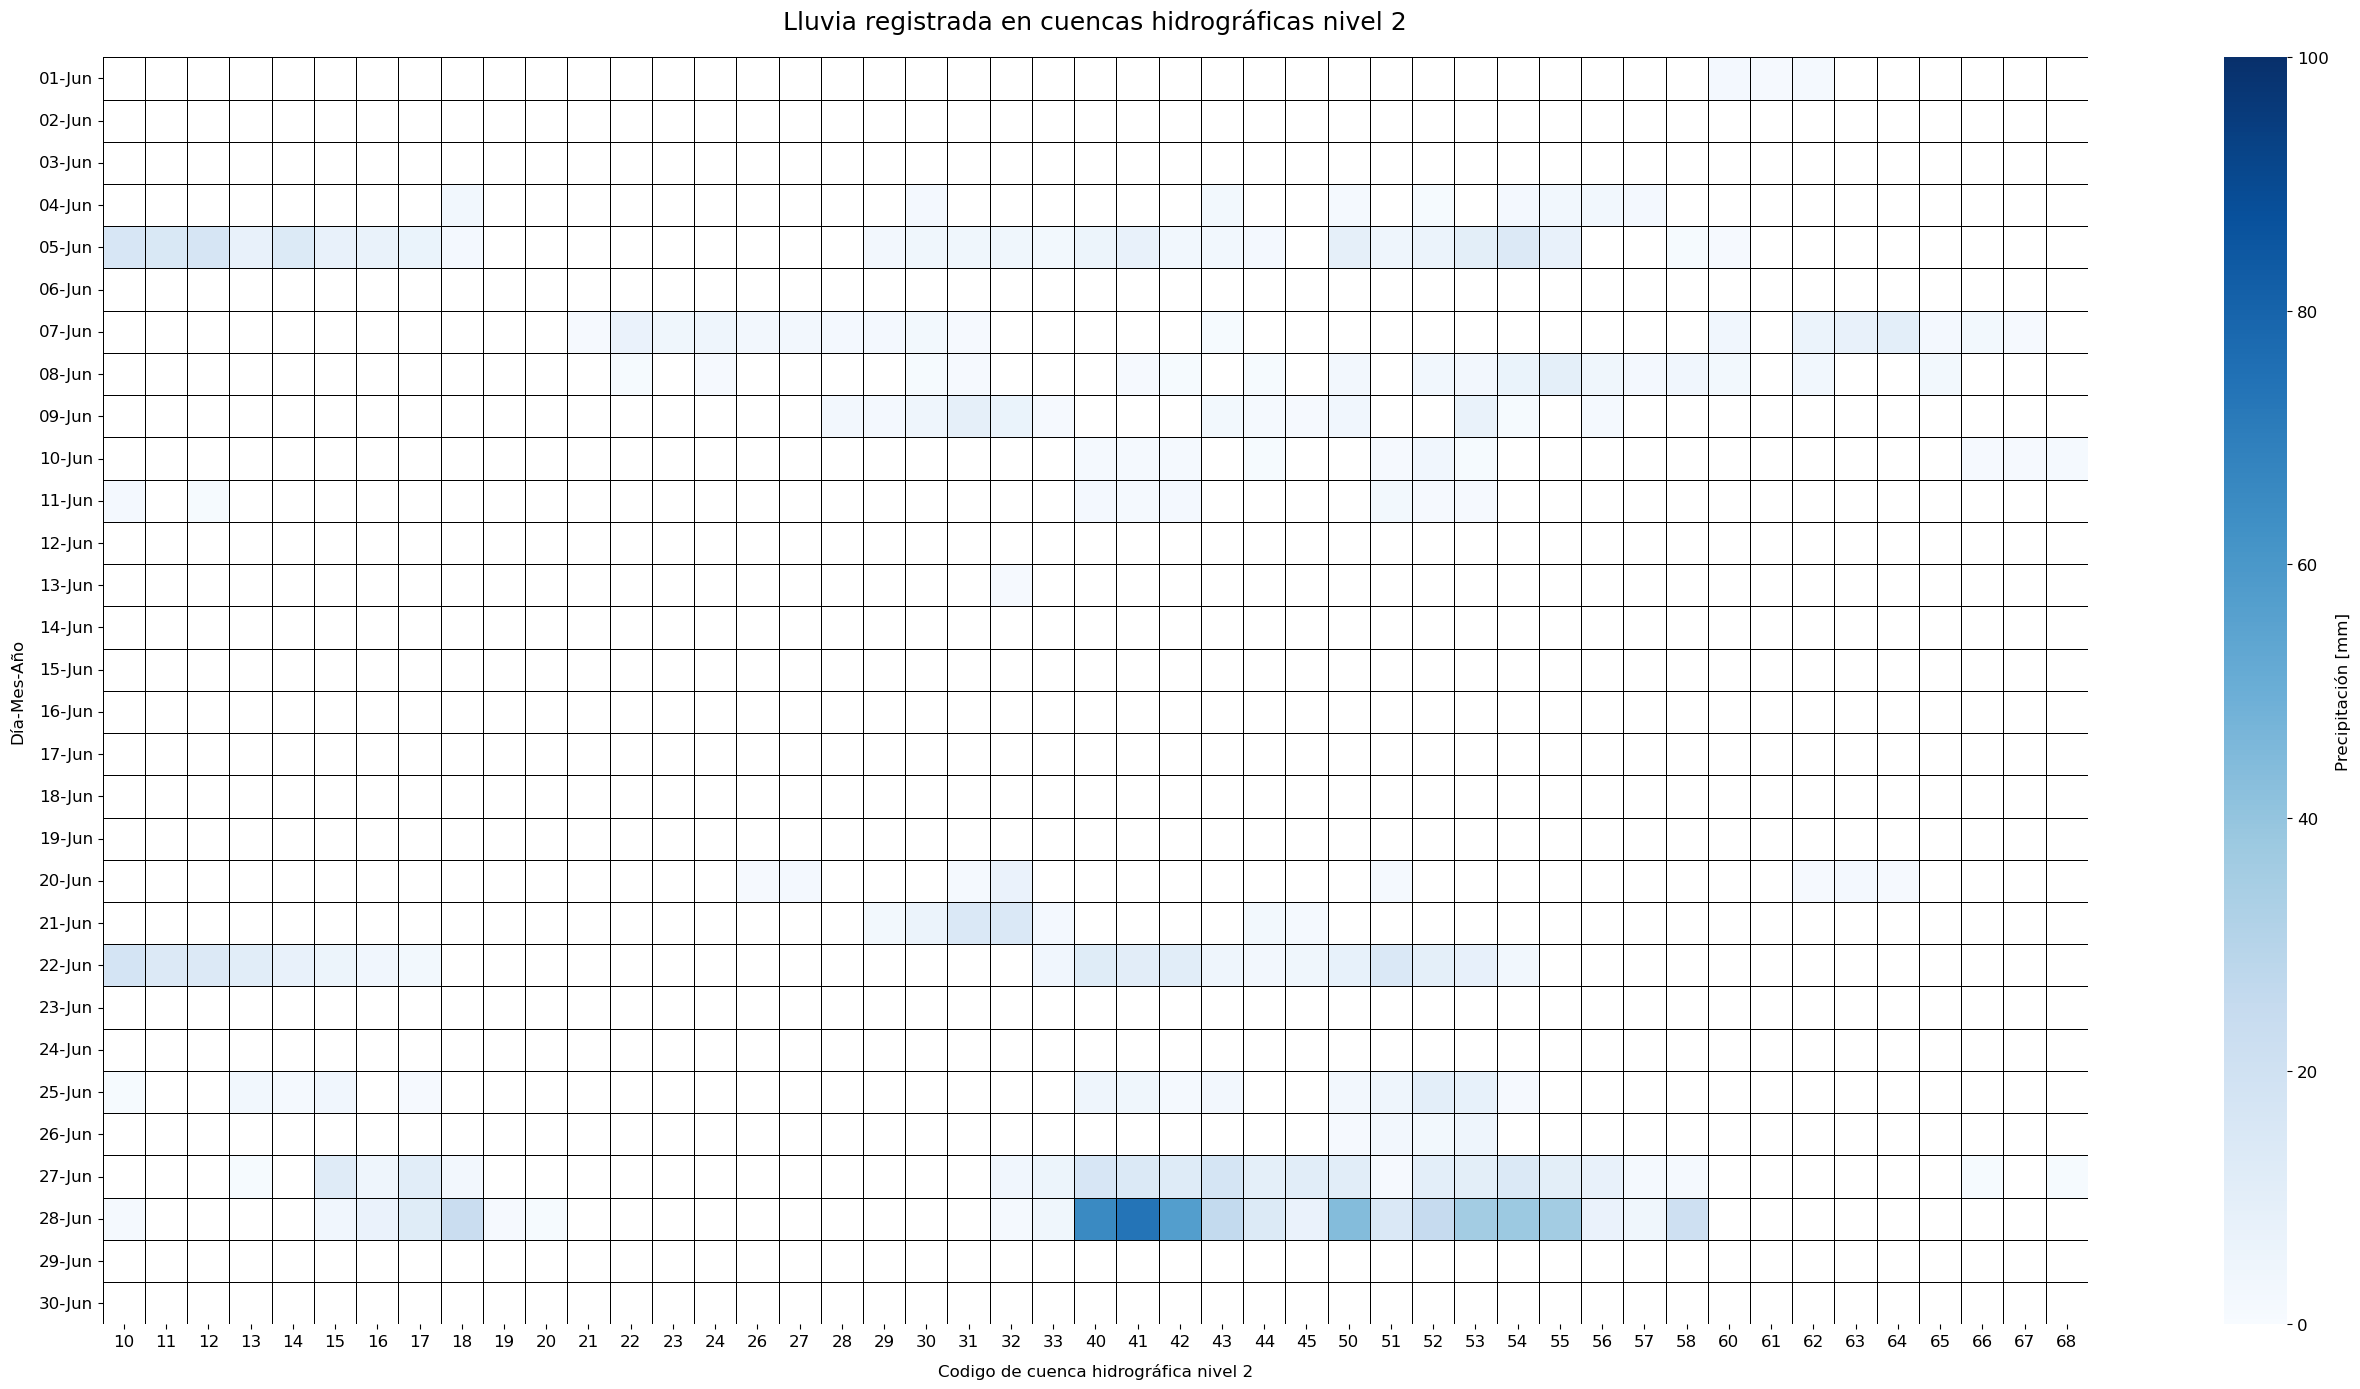

In [38]:
from cProfile import label
from matplotlib.pyplot import axis
from numpy import size, sort
import matplotlib
from matplotlib import pyplot as plt

font_size = 12
fig, ax = plt.subplots(figsize=(28,14))

values = piv2.to_numpy(dtype=float)

myColors = ['#ffffff','#F7FCF0','#E0F3DB','#CCEBC5','#A8DDB5','#7BCCC4','#4EB3D3','#2B8CBE','#0868AC','#084081']
# cmap = matplotlib.colors.LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))
cmap = "Blues"
# cmap = "YlGnBu"

# sns.set(font_scale=1) # font size 2 
# ax = sns.heatmap(piv2,square=True,cmap="YlGnBu",vmin=0, vmax=100,annot=True,linewidths=0.5,linecolor='black',annot_kws={'fontsize':8},cbar_kws={"shrink": .82,"label":'Precipitación [mm]'},mask=values == 0,ax=ax)
ax = sns.heatmap(piv2,square=True,cmap=cmap,annot=False,vmin=0, vmax=100,linewidths=0.5,linecolor='black',annot_kws={'fontsize':8},cbar_kws={"shrink": 1,"label":'Precipitación [mm]'},mask=values < 1,ax=ax)

ax.set_title('Lluvia registrada en cuencas hidrográficas nivel 2', pad=20, loc='center',size=18)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)

ax.set_ylabel('Día-Mes-Año',rotation=90, labelpad=10,size=font_size)
ax.set_yticklabels(df['FECHA'].dt.strftime('%d-%b'),fontsize=font_size)

ax.set_xlabel('Codigo de cuenca hidrográfica nivel 2', rotation=0, labelpad=10, fontsize=font_size)
ax.tick_params(axis='x', labelsize=font_size)

colorbar = ax.collections[0].colorbar
colorbar.ax.tick_params(labelsize=font_size)
ax.figure.axes[-1].yaxis.label.set_size(font_size)

plt.rcParams.update({'font.family':'Calibri'})
plt.tight_layout()
# plt.savefig('final.png', dpi=1000, bbox_inches='tight')

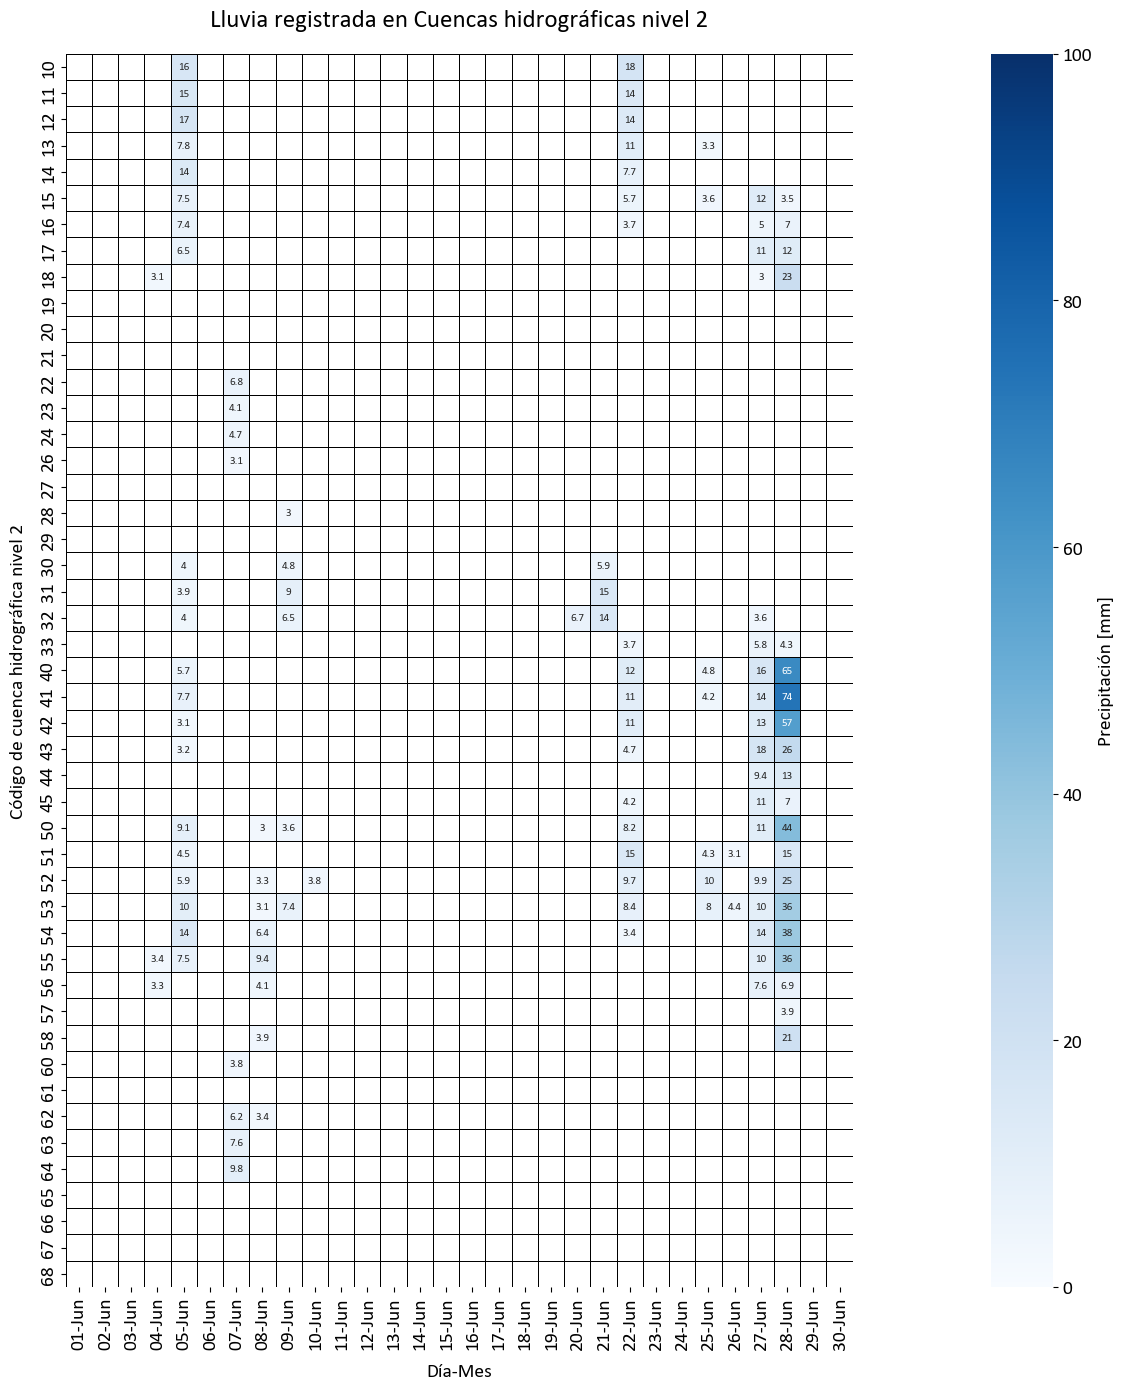

In [40]:
fig, ax = plt.subplots(figsize=(28,14))

values = piv.to_numpy(dtype=float)

myColors = ['#ffffff','#F7FCF0','#E0F3DB','#CCEBC5','#A8DDB5','#7BCCC4','#4EB3D3','#2B8CBE','#0868AC','#084081']
cmap2 = matplotlib.colors.LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))

font_size = 14

# sns.set(font_scale=1) # font size 2 
# ax = sns.heatmap(piv2,square=True,cmap="YlGnBu",vmin=0, vmax=100,annot=True,linewidths=0.5,linecolor='black',annot_kws={'fontsize':8},cbar_kws={"shrink": .82,"label":'Precipitación [mm]'},mask=values == 0,ax=ax)
ax = sns.heatmap(piv,square=True,cmap="Blues",vmin=0, vmax=100,annot = True,linewidths=0.5,linecolor='black',annot_kws={'fontsize':8},cbar_kws={"shrink": 1,"label":'Precipitación [mm]'},mask=values < 3,ax=ax)

ax.set_title('Lluvia registrada en Cuencas hidrográficas nivel 2', pad=20, loc='center',size=18)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)

# ax.set_xlabel('Día-Mes-Año',rotation=0, labelpad=10,size=font_size)
ax.set_xlabel('Día-Mes',rotation=0, labelpad=10,size=font_size)
ax.set_xticklabels(df['FECHA'].dt.strftime('%d-%b'),fontsize=font_size)

ax.set_ylabel('Código de cuenca hidrográfica nivel 2', rotation=90, labelpad=10, fontsize=font_size)
ax.tick_params(axis='y', labelsize=font_size)

colorbar = ax.collections[0].colorbar
colorbar.ax.tick_params(labelsize=font_size)
ax.figure.axes[-1].yaxis.label.set_size(font_size)

plt.rcParams.update({'font.family':'Calibri'})
plt.tight_layout()
plt.savefig('junio_2023.png', dpi=1000, bbox_inches='tight')

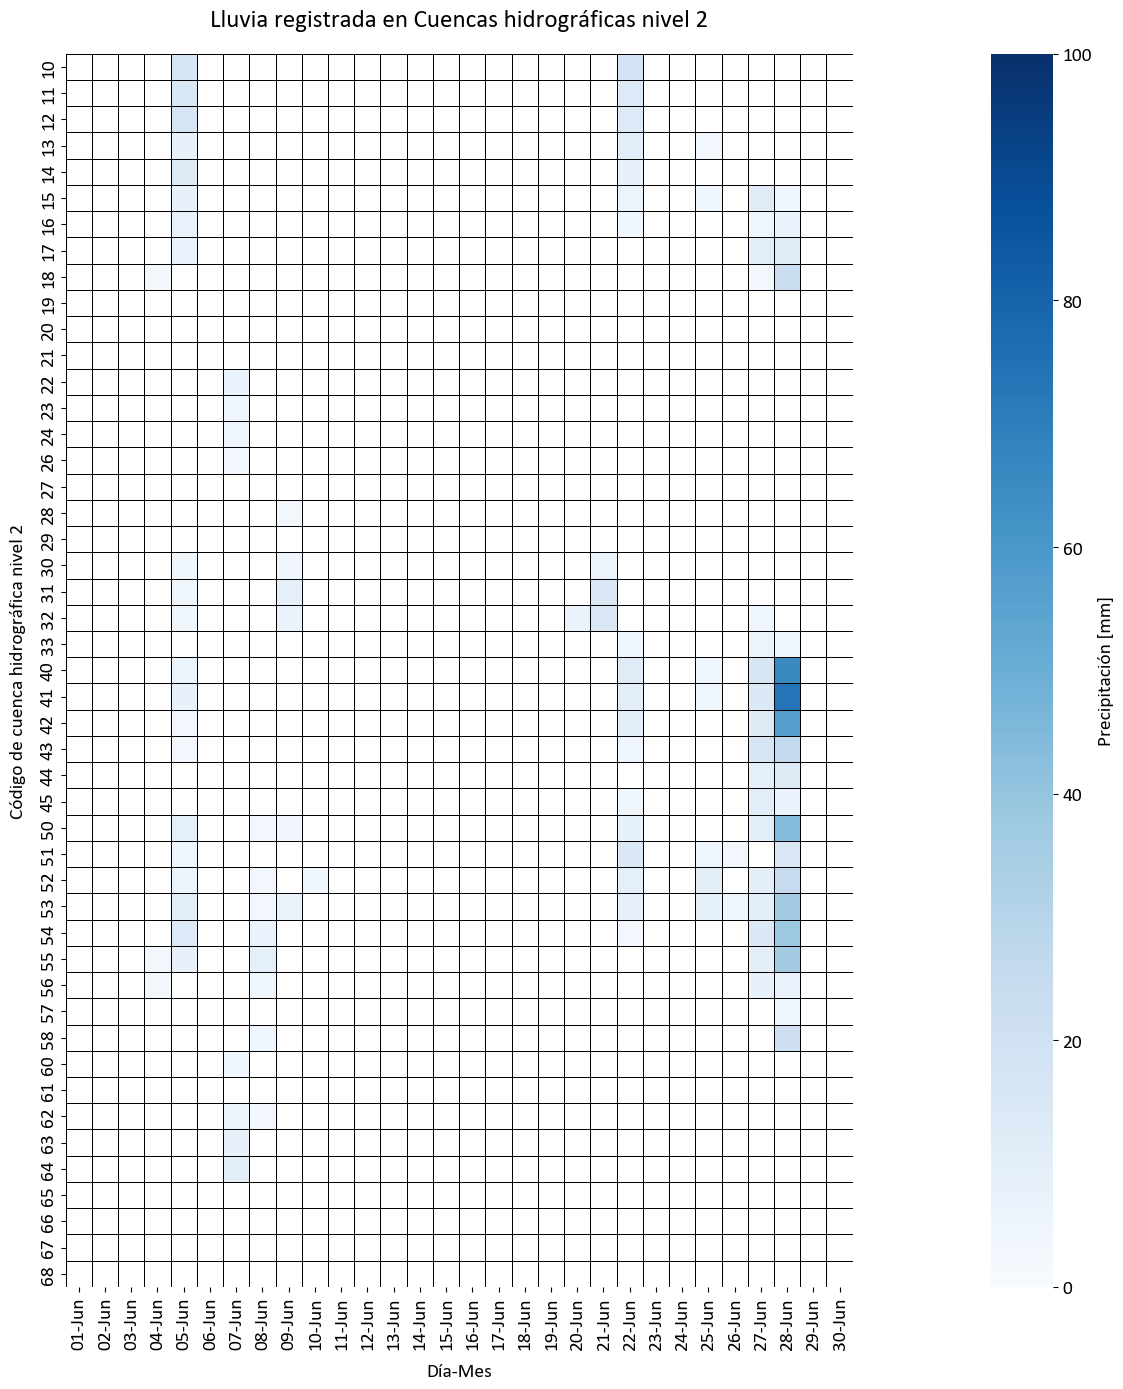

In [42]:
fig, ax = plt.subplots(figsize=(28,14))

values = piv.to_numpy(dtype=float)

myColors = ['#ffffff','#F7FCF0','#E0F3DB','#CCEBC5','#A8DDB5','#7BCCC4','#4EB3D3','#2B8CBE','#0868AC','#084081']
cmap2 = matplotlib.colors.LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))

font_size = 14

# sns.set(font_scale=1) # font size 2 
# ax = sns.heatmap(piv2,square=True,cmap="YlGnBu",vmin=0, vmax=100,annot=True,linewidths=0.5,linecolor='black',annot_kws={'fontsize':8},cbar_kws={"shrink": .82,"label":'Precipitación [mm]'},mask=values == 0,ax=ax)
ax = sns.heatmap(piv,square=True,cmap="Blues",vmin=0, vmax=100,annot = False,linewidths=0.5,linecolor='black',annot_kws={'fontsize':8},cbar_kws={"shrink": 1,"label":'Precipitación [mm]'},mask=values < 3,ax=ax)

ax.set_title('Lluvia registrada en Cuencas hidrográficas nivel 2', pad=20, loc='center',size=18)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)

# ax.set_xlabel('Día-Mes-Año',rotation=0, labelpad=10,size=font_size)
ax.set_xlabel('Día-Mes',rotation=0, labelpad=10,size=font_size)
ax.set_xticklabels(df['FECHA'].dt.strftime('%d-%b'),fontsize=font_size)

ax.set_ylabel('Código de cuenca hidrográfica nivel 2', rotation=90, labelpad=10, fontsize=font_size)
ax.tick_params(axis='y', labelsize=font_size)

colorbar = ax.collections[0].colorbar
colorbar.ax.tick_params(labelsize=font_size)
ax.figure.axes[-1].yaxis.label.set_size(font_size)

plt.rcParams.update({'font.family':'Calibri'})
plt.tight_layout()
plt.savefig('junio_2023_v2.png', dpi=1000, bbox_inches='tight')